In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
train_path = "/home/data/train.json"
with open(train_path, 'r') as f:
    train_data = json.load(f)

train_df = pd.DataFrame(train_data)
print(f"Training data shape: {train_df.shape}")
print(f"Columns: {train_df.columns.tolist()}")
train_df.head()

Training data shape: (2878, 32)
Columns: ['giver_username_if_known', 'number_of_downvotes_of_request_at_retrieval', 'number_of_upvotes_of_request_at_retrieval', 'post_was_edited', 'request_id', 'request_number_of_comments_at_retrieval', 'request_text', 'request_text_edit_aware', 'request_title', 'requester_account_age_in_days_at_request', 'requester_account_age_in_days_at_retrieval', 'requester_days_since_first_post_on_raop_at_request', 'requester_days_since_first_post_on_raop_at_retrieval', 'requester_number_of_comments_at_request', 'requester_number_of_comments_at_retrieval', 'requester_number_of_comments_in_raop_at_request', 'requester_number_of_comments_in_raop_at_retrieval', 'requester_number_of_posts_at_request', 'requester_number_of_posts_at_retrieval', 'requester_number_of_posts_on_raop_at_request', 'requester_number_of_posts_on_raop_at_retrieval', 'requester_number_of_subreddits_at_request', 'requester_received_pizza', 'requester_subreddits_at_request', 'requester_upvotes_minu

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,2,5,False,t3_q8ycf,0,I will soon be going on a long deployment whic...,I will soon be going on a long deployment whic...,"[REQUEST] Oceanside, Ca. USA- US Marine getti...",0.000000,...,False,[Random_Acts_Of_Pizza],3,3,7,7,None,SDMarine,1.330391e+09,1.330391e+09
1,N/A,2,4,False,t3_ixnia,20,"We would all really appreciate it, and would e...","We would all really appreciate it, and would e...",[REQUEST] Three (verified) medical students in...,99.526863,...,False,"[AskReddit, IAmA, TwoXChromosomes, circlejerk,...",491,883,1459,2187,None,TheycallmeFoxJohnson,1.311434e+09,1.311430e+09
2,N/A,1,2,True,t3_ndy6g,0,"It took a lot of courage to make this post, an...","It took a lot of courage to make this post, an...",(REQUEST) not home 4 the holidays &amp; would ...,0.000000,...,False,[Random_Acts_Of_Pizza],1,1,3,3,None,riverfrontmom,1.323968e+09,1.323968e+09
3,N/A,1,1,1363315140.0,t3_1abbu1,32,I will go ahead and say that I got a pizza mea...,I will go ahead and say that I got a pizza mea...,[REQUEST] Not much food until tomorrow.,491.088264,...,True,"[Entroductions, RandomActsOfChristmas, RandomK...",25,21,165,195,shroom,Joeramos,1.363305e+09,1.363301e+09
4,N/A,3,14,False,t3_kseg4,3,My '99 Jeep Cherokee I've had for 10 years now...,My '99 Jeep Cherokee I've had for 10 years now...,[Request] Had my car stolen today,369.417558,...,False,"[DetroitRedWings, DoesAnybodyElse, FoodPorn, K...",942,2043,1906,3483,None,m4ngo,1.317088e+09,1.317084e+09


Target distribution:
requester_received_pizza
False    2163
True      715
Name: count, dtype: int64

Target rate: 0.2484


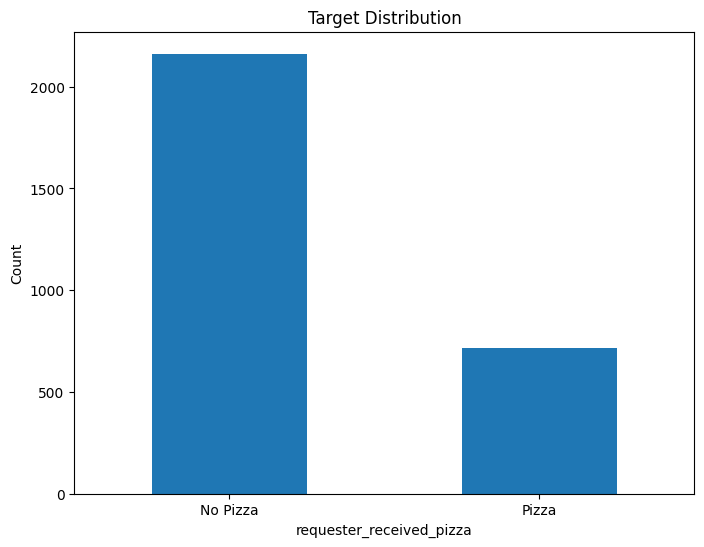

In [3]:
# Analyze target distribution
target_col = 'requester_received_pizza'
print("Target distribution:")
print(train_df[target_col].value_counts())
print(f"\nTarget rate: {train_df[target_col].mean():.4f}")

# Check for class imbalance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
train_df[target_col].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Pizza', 'Pizza'], rotation=0)
plt.show()

In [4]:
# Analyze text features
print("Text feature analysis:")
print(f"Request title length (chars): {train_df['request_title'].str.len().describe()}")
print(f"\nRequest text length (chars): {train_df['request_text'].str.len().describe()}")
print(f"\nRequest text edit aware length (chars): {train_df['request_text_edit_aware'].str.len().describe()}")

# Check for missing values in text fields
print(f"\nMissing values:")
print(f"request_title: {train_df['request_title'].isnull().sum()}")
print(f"request_text: {train_df['request_text'].isnull().sum()}")
print(f"request_text_edit_aware: {train_df['request_text_edit_aware'].isnull().sum()}")

Text feature analysis:
Request title length (chars): count    2878.000000
mean       71.572967
std        36.233487
min         7.000000
25%        46.000000
50%        64.000000
75%        90.000000
max       272.000000
Name: request_title, dtype: float64

Request text length (chars): count    2878.000000
mean      402.521543
std       362.393727
min         0.000000
25%       182.000000
50%       308.000000
75%       503.750000
max      4460.000000
Name: request_text, dtype: float64

Request text edit aware length (chars): count    2878.000000
mean      394.567755
std       351.922518
min         0.000000
25%       180.000000
50%       302.000000
75%       498.000000
max      4460.000000
Name: request_text_edit_aware, dtype: float64

Missing values:
request_title: 0
request_text: 0
request_text_edit_aware: 0


In [5]:
# Analyze numerical features
numerical_features = [
    'requester_account_age_in_days_at_request',
    'requester_number_of_comments_at_request', 
    'requester_number_of_posts_at_request',
    'requester_upvotes_minus_downvotes_at_request',
    'requester_upvotes_plus_downvotes_at_request',
    'requester_number_of_subreddits_at_request',
    'request_number_of_comments_at_retrieval',
    'number_of_upvotes_of_request_at_retrieval',
    'number_of_downvotes_of_request_at_retrieval'
]

print("Numerical features summary:")
print(train_df[numerical_features].describe())

# Check for missing values in numerical features
print(f"\nMissing values in numerical features:")
print(train_df[numerical_features].isnull().sum())

Numerical features summary:
       requester_account_age_in_days_at_request  \
count                               2878.000000   
mean                                 250.682364   
std                                  301.838771   
min                                    0.000000   
25%                                    3.038877   
50%                                  155.156377   
75%                                  383.640090   
max                                 2809.750787   

       requester_number_of_comments_at_request  \
count                              2878.000000   
mean                                112.311327   
std                                 192.017515   
min                                   0.000000   
25%                                   0.000000   
50%                                  22.000000   
75%                                 132.000000   
max                                 981.000000   

       requester_number_of_posts_at_request  \
count         